Hola **Alan**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo importando las librerías y cargando tus datos en celdas diferentes.
</div>

In [3]:
# mostrar información del DataFrame
instacart_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


In [8]:
'''
Existen valores nulos en algunos dataframes, analizando el DF de instacart_df me genera duda que la columna 
days_since_prior_order sea un Float. Aunque técnicamente puede pasar día y medio desde que se hizo la última orden.
A simple vista products_df, instacart_df y order_products_df contienen valores nulos.

'''

'\nExisten valores nulos en algunos dataframes, analizando el DF de instacart_df me genera duda que la columna \ndays_since_prior_order sea un Float. Aunque técnicamente puede pasar día y medio desde que se hizo la última orden.\nA simple vista products_df, instacart_df y order_products_df contienen valores nulos.\n\n'

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

In [9]:
'''
Primero, confirmo que los tipos de datos correspondan a las columnas. Hasta ahora, todos los ID son tipo Int. 
Se puede cambiar la columna days_since_prior_order a tipo Int, para redondear los días transcurridos. De igual manera
confirmar los valores nulos que hay en esta.
Para products_df los tipos de datos se ven bien, solo debo revisar por qué en "product_name" hay valores nulos.
Hacer lo mismo para order_products_df en sus datos nulos. 

Después de revisar los nulos, debo verificar que no existan duplicados (Sí, algunos DF no tienen nulos pero no sé 
exactamente la calidad de los datos.)

'''

'\nPrimero, confirmo que los tipos de datos correspondan a las columnas. Hasta ahora, todos los ID son tipo Int. \nSe puede cambiar la columna days_since_prior_order a tipo Int, para redondear los días transcurridos. De igual manera\nconfirmar los valores nulos que hay en esta.\nPara products_df los tipos de datos se ven bien, solo debo revisar por qué en "product_name" hay valores nulos.\nHacer lo mismo para order_products_df en sus datos nulos. \n\nDespués de revisar los nulos, debo verificar que no existan duplicados (Sí, algunos DF no tienen nulos pero no sé \nexactamente la calidad de los datos.)\n\n'

In [8]:
#Confirmo primero si hay pérdida de datos decimales al convertir de float a int
print(instacart_df.loc[:,'days_since_prior_order'].sample(50))
#Al parecer solo hay .0, y valores Nulos, nada relevante en pérdida de datos. Puedo proceder a cambiar su tipo de dato

#Confirmo primero si hay pérdida de datos decimales al convertir de float a int
print(order_products_df.loc[:,'add_to_cart_order'].sample(50))
#Al parecer solo hay .0, y valores Nulos, nada relevante en pérdida de datos. Puedo proceder a cambiar su tipo de dato

88895     14.0
117800     9.0
185966     2.0
339673     7.0
428049     5.0
160408    10.0
1097      16.0
293687     8.0
141621     9.0
473822    30.0
195614     4.0
32824      3.0
231613     7.0
206948    30.0
107597    30.0
239316     4.0
412341     9.0
288806    30.0
430264     3.0
201359     6.0
429290    12.0
355631     5.0
229038    12.0
176394     3.0
93692      7.0
139664    30.0
30646     28.0
385832     5.0
431493     2.0
392446     4.0
290973     5.0
166526     8.0
285876    26.0
309522     2.0
290024    21.0
150518    30.0
320785    30.0
82991      4.0
63986      8.0
79279      7.0
165114     7.0
422021    30.0
425169    30.0
373409     7.0
140132    30.0
165337     8.0
439819    29.0
250774     6.0
357553     5.0
316061     4.0
Name: days_since_prior_order, dtype: float64
3988713     4.0
3197541    33.0
2613584     9.0
1818028     3.0
781431      6.0
3623307    12.0
1261283     2.0
2913821     6.0
650867      2.0
2497378     3.0
1242690    10.0
4489507     4.0
3076998     3

In [9]:
#Sin embargo, hay valores nulos. Esto me va a dar un error al intentar convertir de float a int, entonces rellenamos primero:
instacart_df.fillna(0,inplace=True)
print(instacart_df.isna().sum())

#Lo mismo para el DF de Order_Products
order_products_df.fillna(0,inplace=True)
print(order_products_df.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [10]:
#Hecho esto, ya puedo convertirlo a int
instacart_df['days_since_prior_order'] = instacart_df['days_since_prior_order'].astype('int')
print(instacart_df.info())
#Listo, la columna ya es de tipo Int64.

#Hecho esto, ya puedo convertirlo a int
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int')
print(order_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  478967 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [38]:
# Revisa si hay pedidos duplicados
print(instacart_df.info())
print()
print(instacart_df.duplicated().any()) #Sí hay valores duplicados
print(instacart_df.duplicated().sum()) #15 valores duplicados
display(instacart_df.loc[instacart_df.duplicated(keep=False)].sort_values(by='order_id')) #Imprimimos los valores duplicados
#y los ordenamos por ID para leerlos más fácilmente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478967 non-null  int64
 1   user_id                 478967 non-null  int64
 2   order_number            478967 non-null  int64
 3   order_dow               478967 non-null  int64
 4   order_hour_of_day       478967 non-null  int64
 5   days_since_prior_order  478967 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB
None

True
15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10
371905,391768,57671,19,3,2,10
119251,408114,68324,4,3,2,18
321100,408114,68324,4,3,2,18
394347,467134,63189,21,3,2,2
250626,467134,63189,21,3,2,2
99462,794638,50898,24,3,2,2
145574,794638,50898,24,3,2,2
311713,1021560,53767,3,3,2,9
242618,1021560,53767,3,3,2,9


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [14]:
'''
Todos los valores duplicados fueron del día Miércoles a las 2:00

'''

'\nTodos los valores duplicados fueron del día Miércoles a las 2:00\n\n'

In [13]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
display(instacart_df.loc[(instacart_df['order_dow']==3) & (instacart_df['order_hour_of_day'] == 2)])


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16
5156,2190225,138285,18,3,2,11
15506,553049,58599,13,3,2,7
18420,382357,120200,19,3,2,11
24691,690242,77357,2,3,2,9
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30
458816,910166,164782,18,3,2,4
459635,1680532,106435,6,3,2,21
468324,222962,54979,59,3,2,3


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro aplicado y la revisión de duplicados! Te recomiendo no usar `print()` para mostrar resultados de DataFrame ya que como puedes observar se muestran como strings, en su lugar puedes usar `display()` y esto mostrará los resultados en formato de tabla. Te pediría ese ajuste para el resto de casos donde usas print para los dataframes
</div>

¿Qué sugiere este resultado?

In [16]:
# Elimina los pedidos duplicados
instacart_df.drop_duplicates(inplace=True)

In [17]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_df.duplicated().any()) #No hay valores duplicados
print(instacart_df.duplicated().sum()) #0

False
0


In [18]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(instacart_df['order_id'].duplicated().any())

False


Describe brevemente tus hallazgos y lo que hiciste con ellos

In [19]:
'''
Primero confirmé que hubieran duplicados con duplicated().any(). Al regresar un True, quiere decir que sí hubo.
Posterior, quise saber cuántos datos estaban duplicados con duplicated().sum().
Quise revisar visualmente qué valores estaban duplicados con 
print(instacart_df.loc[instacart_df.duplicated(keep=False)].sort_values(by='order_id')).
Esto me permitió ver que los valores duplicados eran del día Miércoles a las 2:00. 
Confirmando esto, ahora sí procedimos a eliminar los duplicados y re-confirmar que ya no estuvieran.
'''

"\nPrimero confirmé que hubieran duplicados con duplicated().any(). Al regresar un True, quiere decir que sí hubo.\nPosterior, quise saber cuántos datos estaban duplicados con duplicated().sum().\nQuise revisar visualmente qué valores estaban duplicados con \nprint(instacart_df.loc[instacart_df.duplicated(keep=False)].sort_values(by='order_id')).\nEsto me permitió ver que los valores duplicados eran del día Miércoles a las 2:00. \nConfirmando esto, ahora sí procedimos a eliminar los duplicados y re-confirmar que ya no estuvieran.\n"

### `products` data frame

In [20]:
# Verifica si hay filas totalmente duplicadas
print(products_df.info())
print()
print(products_df.duplicated().any()) #A simple vista no hay valores duplicados
print(products_df.duplicated().sum()) #0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

False
0


In [21]:
# Verifica si hay IDs duplicadas de productos
print(products_df['product_id'].duplicated().any()) #A simple vista no hay valores duplicados
print(products_df['product_id'].duplicated().sum()) #0

False
0


In [14]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df['product_name'] = products_df['product_name'].str.upper()
print(products_df['product_name'].str.upper().duplicated().any()) #Sí hay valores duplicados
print(products_df['product_name'].str.upper().duplicated().sum()) #1361 valores duplicados
display(products_df.loc[products_df['product_name'].duplicated(keep=False)].sort_values(by='product_id'))

True
1361


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,BIOTIN 1000 MCG,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,FRESH SCENT DISHWASHER DETERGENT WITH DAWN,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La transformación a mayúsculas de los nombres debe ser guardada sobre la misma columna, de otra forma más adelante puedes llegar a tener problemas con las métricas debido a casos donde un producto tenga una letra mayúscula y en otro no.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, de esta forma se guarda la transformación en la variable para poder ser utilizada!
</div>

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicados_no_faltantes = products_df[products_df['product_name'].notna() & products_df['product_name'].duplicated(keep=False)]
display(duplicados_no_faltantes)

,product_id,product_name,aisle_id,department_id
41,42,BIOTIN 1000 MCG,47,11
185,186,FRESH SCENT DISHWASHER DETERGENT WITH DAWN,74,17
515,516,AMERICAN CHEESE SLICES,21,16
1538,1539,CAULIFLOWER HEAD,83,4
1783,1784,NUTRITION PROTEIN MIX BLUEBERRY NUT,117,19
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

In [24]:
'''
No hay productos duplicados como tal, sin embargo, aún quedan los valores ausentes.

'''

'\nNo hay productos duplicados como tal, sin embargo, aún quedan los valores ausentes.\n\n'

### `departments` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
print(departments_df.info())
print(departments_df.duplicated().any()) #A simple vista no hay valores duplicados
print(departments_df.duplicated().sum()) #0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
False
0


In [16]:
# Revisa si hay IDs duplicadas de productos
display(departments_df) #No hay ningún dato duplicado de departamentos.

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Describe brevemente tus hallazgos y lo que hiciste con ellos.

In [27]:
'''
Todos los datos se ven correctos, no hay ningún duplicado.

'''

'\nTodos los datos se ven correctos, no hay ningún duplicado.\n\n'

### `aisles` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas
print(aisles_df.info())
print(aisles_df.duplicated().any()) #A simple vista no hay valores duplicados
print(aisles_df.duplicated().sum()) #0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
False
0


In [29]:
# Revisa si hay IDs duplicadas de productos
print(aisles_df['aisle_id'].duplicated().any()) 
print(aisles_df['aisle_id'].duplicated().sum()) 

print(aisles_df['aisle'].str.upper().duplicated().any()) 
print(aisles_df['aisle'].str.upper().duplicated().sum()) 

False
0
False
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

In [30]:
'''
Nuevamente no hay datos duplicados ni faltantes
'''

'\nNuevamente no hay datos duplicados ni faltantes\n'

### `order_products` data frame

In [31]:
# Revisa si hay filas totalmente duplicadas
print(order_products_df.info(show_counts=True))
print(order_products_df.duplicated().any()) #A simple vista no hay valores duplicados
print(order_products_df.duplicated().sum()) #0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None
False
0


In [18]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products_df['order_id'].duplicated().any())
print(order_products_df['order_id'].duplicated().sum()) 
display(order_products_df.loc[order_products_df['order_id'].duplicated(keep=False)].sort_values(by='order_id')) 
#No es duplicado.
#Una Orden puede tener múltiples productos y reordenamiento

print(order_products_df['product_id'].duplicated().any()) 
print(order_products_df['product_id'].duplicated().sum()) 

print(order_products_df['reordered'].duplicated().any()) 
print(order_products_df['reordered'].duplicated().sum()) 

True
4094961


,order_id,product_id,add_to_cart_order,reordered
2502556,4,41276,13,1
3189411,4,25146,11,1
3977678,4,21351,6,1
311805,4,46842,1,0
1169276,4,27761,4,1
...,...,...,...,...
455750,3421071,35921,3,0
1505667,3421077,27966,1,0
719972,3421077,26940,3,0
4000108,3421077,27845,4,0


True
4499434
True
4545005


Describe brevemente tus hallazgos y lo que hiciste con ellos.

In [ ]:
'''
Revisando nuevamente el código y la lógica, no existe algún otro duplicado engañoso. 
Sí sería engañoso ya que el order_id se repite, pero es lógico. Una orden puede tener múltiples productos.

'''

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la revisión de estos últimos datasets. No olvides redactar los hallazgos encontrados cómo se solicita a lo largo del notebook
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy buen observación!
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [19]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products_df['product_name'].duplicated().any())
print(products_df['product_name'].duplicated().sum()) 
display(products_df.loc[products_df['product_name'].duplicated(keep=False)].sort_values(by='product_name'))

True
1361


,product_id,product_name,aisle_id,department_id
23339,23340,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [34]:
'''
A simple vista, los productos "duplicados" son aquellos que no tienen product_name. Aunque, curiosamente, se ubican en el
aisle número 100 del departamento 21, o sea "Missing"

'''

'\nA simple vista, los productos "duplicados" son aquellos que no tienen product_name. Aunque, curiosamente, se ubican en el\naisle número 100 del departamento 21, o sea "Missing"\n\n'

In [20]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
display(products_df.query("aisle_id == 100"))

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [36]:
'''
Es correcto, todos se encuentran en el pasillo 100

'''

'\nEs correcto, todos se encuentran en el pasillo 100\n\n'

In [21]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
display(products_df.query("department_id == 21"))

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [38]:
'''
También es correcto, lo cual haría sentido ya que ese departamento es el "Missing"

'''

'\nTambién es correcto, lo cual haría sentido ya que ese departamento es el "Missing"\n\n'

In [22]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(departments_df.loc[departments_df.loc[:,'department_id'] == 21])
print()
display(aisles_df.loc[aisles_df.loc[:,'aisle_id'] == 100])

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Aplicaste los filtros sobre los datasets correctos para obtener el resultado
</div>

Describe brevemente cuáles son tus hallazgos.

In [40]:
'''
Confirmamos que, sí, el departamento es el de "Missing" de igual manera que el pasillo corresponde a "Missing"
'''

'\nConfirmamos que, sí, el departamento es el de "Missing" de igual manera que el pasillo corresponde a "Missing"\n'

In [23]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df.fillna('Unknown', inplace=True)
display(products_df.loc[products_df['department_id'] == 21])

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

In [42]:
'''
Los valores nulos han sido sustituidos por Unknown. Esto nos ayudará al procesamiento de datos.
De todas maneras, tenemos de antecedente que tanto el pasillo como el departamento son de "Missing"

'''

'\nLos valores nulos han sido sustituidos por Unknown. Esto nos ayudará al procesamiento de datos.\nDe todas maneras, tenemos de antecedente que tanto el pasillo como el departamento son de "Missing"\n\n'

### `orders` data frame

In [24]:
# Encuentra los valores ausentes
print(instacart_df.isna().sum())
display(instacart_df.sample(20))

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
260006,2608071,165658,3,6,16,7
92664,3377174,89824,7,1,15,19
356388,714376,40525,7,6,18,30
143140,3011919,59819,23,2,11,4
67363,2513017,78321,35,0,16,3
128952,829873,16047,26,3,18,2
204640,1181236,60396,54,3,11,5
6433,2537005,183945,40,5,10,2
476304,3082376,120463,57,5,17,5
241507,3113760,139177,1,5,17,0


In [44]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
'''
No, de hecho no hay ningún valor ausente en el DF
'''

'\nNo, de hecho no hay ningún valor ausente en el DF\n'

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [25]:
# Encuentra los valores ausentes
print(order_products_df.isna().sum())
display(order_products_df.sample(20))

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


,order_id,product_id,add_to_cart_order,reordered
1588197,873887,8436,3,1
2093050,1746449,47766,6,1
1629436,3191134,1511,1,1
340021,3333609,11790,1,0
3688321,3106218,48205,11,0
1762574,1120910,24535,1,0
217501,2711216,22556,7,1
2106474,3188169,260,13,1
709597,2077937,8197,8,0
820537,2461716,16797,4,1


In [46]:
# ¿Cuáles son los valores mínimos y máximos en esta columna? ###¿En qué columna......?
print(min(order_products_df['add_to_cart_order']))
print(max(order_products_df['add_to_cart_order']))


0
64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo buscando los valores máximos y mínimos!
</div>

Describe brevemente cuáles son tus hallazgos.

In [47]:
'''
Puesto que no tiene caso saber el mínimo y el máximo de order_id, product_id y reordered (Ya que es booleano), asumo
que necesitamos saber el min y max de add_to_cart_order.
Siendo 0 el mínimo, es decir, que no han sido agregado al carrito
Y 64 el máximo, que ha sido el producto num. 64 en ser agregado al carrito
'''

'\nPuesto que no tiene caso saber el mínimo y el máximo de order_id, product_id y reordered (Ya que es booleano), asumo\nque necesitamos saber el min y max de add_to_cart_order.\nSiendo 0 el mínimo, es decir, que no han sido agregado al carrito\nY 64 el máximo, que ha sido el producto num. 64 en ser agregado al carrito\n'

In [26]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
null_add_to_cart_ids = order_products_df.loc[order_products_df['add_to_cart_order']==0]
display(null_add_to_cart_ids)

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,0,0
9926,1968313,43867,0,0
14394,2926893,11688,0,0
16418,1717990,4142,0,0
30114,1959075,42828,0,1
...,...,...,...,...
4505662,1800005,7411,0,0
4511400,1633337,260,0,0
4517562,404157,9517,0,0
4534112,1673227,17835,0,0


In [30]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

null_add_to_carts = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()
filtered_orders = order_products_df[order_products_df['order_id'].isin(null_add_to_carts)]
product_counts = filtered_orders.groupby('order_id').size()

all_above_64 = (product_counts > 64).all() #Método que evalúa columna por columna y devuelve un Serie. 

print(all_above_64) #Si es True, quiere decir que los pedidos con valores ausentes tienen más de 64 productos
#Caso contrario, no hay pedidos que tengan 64 o menos productos con valores ausentes.


True


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para revisar si los pedidos con valores ausentes tienen o no más de 64 pedidos primero deberías buscar los valores NaN sobre la columna add_to_cart_order y luego deberías usar las order_id que que tienes en la variable `null_add_to_carts` suponiendo que sea donde guardas el resultado anterior (Solo toma los valores de la columna order_id) y filtrar en el dataset original utilizando `isin()` y luego si agrupar por order_id y contar en product_id, ya que de la forma en que lo estás haciendo solo cuenta cuantos valores ausentes hay por órden pero puede que tengas órdenes que tiene valores ausentes y también valores que no lo son y lo que interesa es contar todos estos datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Ahora se aplicó el filtro correcto antes de hacer el conteo, siempre hay que revisar con cuidado el cómo se hace los filtros para obtener las métricas adecuadas
</div>

Describe brevemente cuáles son tus hallazgos.

In [50]:
'''
Sí, todos los pedidos con valores ausentes tienen más de 64 productos.
'''

'\nEl valor mínimo del conteo es 1, quiere decir que solo hubo 1 producto para ese pedido. \nY el máximo fue 63. Quiere decir que la orden tuvo 63 productos añadidos, aunque esto me causa conflicto, pues,\n¿Cómo puede tener add_to_cart_order en 0 si fueron 63 productos? \n'

In [51]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df.info() #Ya las había cambiado a entero jeje
order_products_df.replace(0,999,inplace=True)
print(order_products_df.loc[order_products_df['add_to_cart_order']==999])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999        999
9926      1968313       43867                999        999
14394     2926893       11688                999        999
16418     1717990        4142                999        999
30114     1959075       42828                999          1
...           ...         ...                ...        ...
4505662   1800005        7411                999        999
4511400   1633337         260                999        999
4517562    404157        9517                999        999
4534112   1673227       17835                999        999
4535739 

Describe brevemente tus hallazgos y lo que hiciste con ellos.

In [52]:
'''
Simplemente cambiamos los datos de 0 a 999
Aunque sigo con la duda de cómo pudo ser posible ese escenario de add_to_cart_order = 0
'''

'\nSimplemente cambiamos los datos de 0 a 999\nAunque sigo con la duda de cómo pudo ser posible ese escenario de add_to_cart_order = 0\n'

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


In [53]:
'''
Sirvió revisar a detalle las órdenes, ya que como algunos productos no tenían nombre (Aunque sí tienen su product_id), 
nos podría causar ruido al analizar la información. 
Además de encontrar aquellos pedidos en los que no se tiene algún orden en la columna "add_to_cart_order"

'''

'\nSirvió revisar a detalle las órdenes, ya que como algunos productos no tenían nombre (Aunque sí tienen su product_id), \nnos podría causar ruido al analizar la información. \nAdemás de encontrar aquellos pedidos en los que no se tiene algún orden en la columna "add_to_cart_order"\n\n'

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [54]:
aux_sort_instacart_hod = instacart_df.sort_values(by='order_hour_of_day')
print(aux_sort_instacart_hod['order_hour_of_day'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [55]:
aux_sort_instacart_dow = instacart_df.sort_values(by='order_dow')
print(aux_sort_instacart_dow['order_dow'].unique())

[0 1 2 3 4 5 6]


Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo con la revisión aplicando el método correcto sobre la columna
</div>

In [56]:
'''
Ambas columnas son congruentes.
'''

'\nAmbas columnas son congruentes.\n'

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64


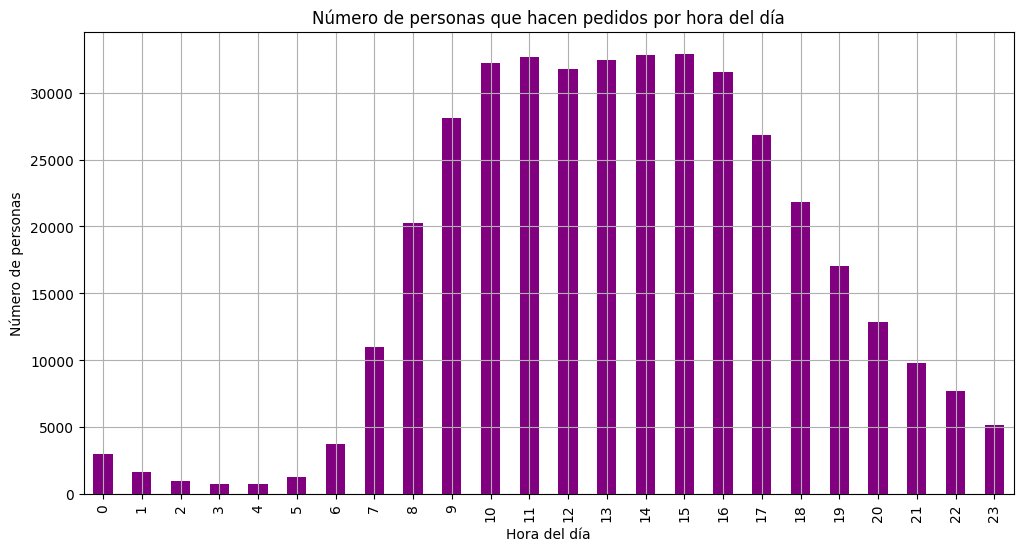

In [57]:
aux_group_hour = instacart_df.groupby(by='order_hour_of_day')['user_id'].nunique()
print(aux_group_hour)
aux_group_hour.plot(
    kind='bar',
    figsize=(12, 6),
    color='purple',
    title='Número de personas que hacen pedidos por hora del día',
    xlabel='Hora del día',
    ylabel='Número de personas',
    grid=True
)

plt.show()

Escribe aquí tus conclusiones

In [58]:
'''
Se puede concluir que entre las 10 y las 16 horas son aquellas con más pedidos.
'''

'\nSe puede concluir que entre las 10 y las 16 horas son aquellas con más pedidos.\n'

### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    57661
1    56479
2    48587
3    45331
4    44281
5    46127
6    45604
Name: user_id, dtype: int64


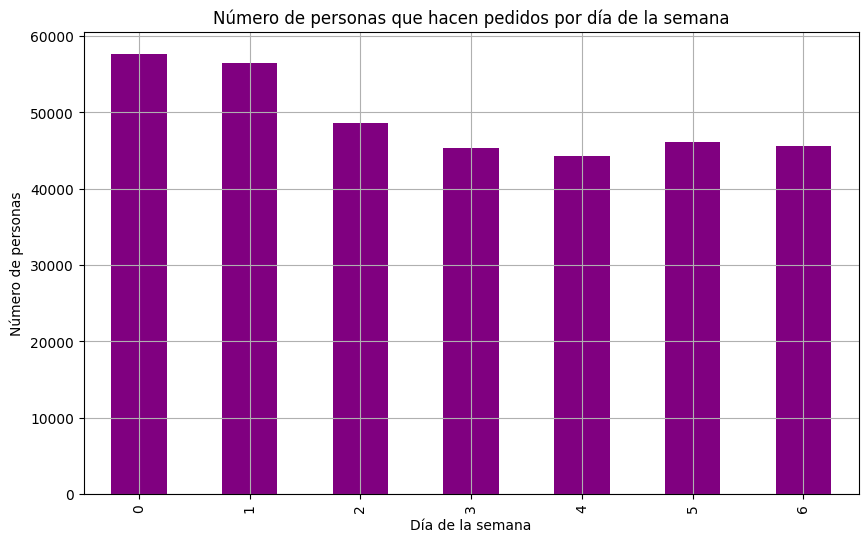

In [59]:
aux_group_dow = instacart_df.groupby(by='order_dow')['user_id'].nunique()
print(aux_group_dow)
aux_group_dow.plot(
    kind='bar',
    figsize=(10, 6),
    color='purple',
    title='Número de personas que hacen pedidos por día de la semana',
    xlabel='Día de la semana',
    ylabel='Número de personas',
    grid=True
)

plt.show()

Escribe aquí tus conclusiones

In [60]:
'''
Todos los días se realizan pedidos, siendo el Domingo el día con más pedidos.
'''

'\nTodos los días se realizan pedidos, siendo el Domingo el día con más pedidos.\n'

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

count    478952.000000
mean         10.433853
std           9.292153
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


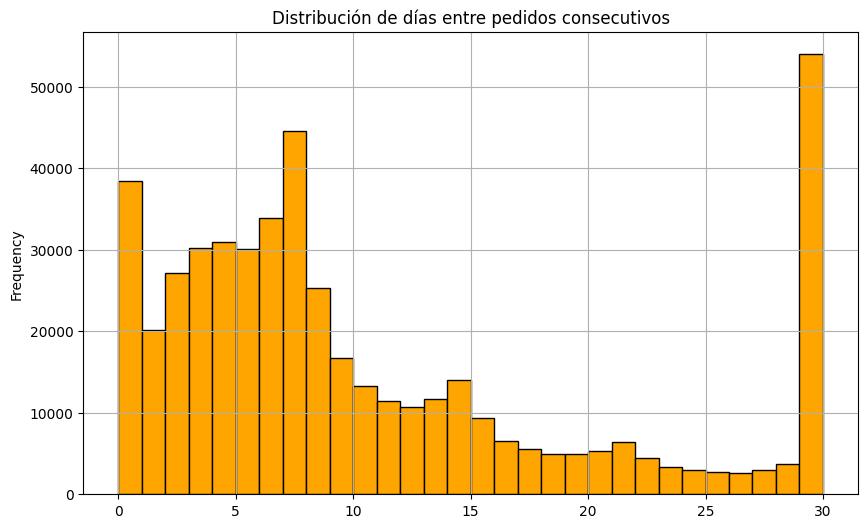

In [61]:
aux_sort_instacart_waiting_days = instacart_df.sort_values(by='days_since_prior_order')
#print(aux_sort_instacart_waiting_days['days_since_prior_order'].unique())

print(instacart_df['days_since_prior_order'].describe()) #Esto nos muestra directamente el mínimo que es 0 y el máximo que es 30

aux_sort_instacart_waiting_days['days_since_prior_order'].plot(
    xlabel='Días desde el último pedido',
    ylabel='Frecuencia',
    kind='hist',
    bins=30,                    
    figsize=(10,6),
    color='orange',
    edgecolor='black',
    title='Distribución de días entre pedidos consecutivos',
    grid=True
)

plt.show()
#print(min(aux_sort_instacart_waiting_days['days_since_prior_order']))
#print(max(aux_sort_instacart_waiting_days['days_since_prior_order']))

#A simple vista, tenemos que el valor mínimo es 0 y el máximo es 30

Escribe aquí tus conclusiones

In [62]:
'''
El valor mínimo es 0, quiere decir que el cliente no espera al día siguiente para hacer otra compra.
En comparación, el valor máximo es 30, entonces el cliente ha esperado hasta 30 días para hacer otro pedido.

De hecho, este es el valor más alto, arriba de 50,000+ pedidos.
'''

'\nEl valor mínimo es 0, quiere decir que el cliente no espera al día siguiente para hacer otra compra.\nEn comparación, el valor máximo es 30, entonces el cliente ha esperado hasta 30 días para hacer otro pedido.\n\nDe hecho, este es el valor más alto, arriba de 50,000+ pedidos.\n'

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con estas visualizaciones y conclusiones
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [42]:
wednesday_data = instacart_df[instacart_df['order_dow'] == 3]
saturday_data = instacart_df[instacart_df['order_dow'] == 6]
display(wednesday_data)
display(saturday_data)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
6,2511640,148233,40,3,8,2
16,3109465,55090,19,3,15,9
28,133707,182261,1,3,10,0
30,1890318,193501,3,3,15,30
35,125325,106853,6,3,19,30
...,...,...,...,...,...,...
478917,972799,89702,4,3,7,10
478946,2406747,63101,11,3,8,5
478956,640934,27104,9,3,10,6
478963,3270802,112087,2,3,13,6


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
11,102585,191558,18,6,16,8
14,2843219,74699,4,6,11,30
20,50934,178510,9,6,9,5
26,1844247,122558,4,6,18,30
...,...,...,...,...,...,...
478924,3274344,145367,13,6,10,13
478930,489820,7287,14,6,19,2
478943,548902,6829,3,6,10,30
478954,984024,47076,2,6,21,6


In [45]:
wednesday_counts = wednesday_data['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday_data['order_hour_of_day'].value_counts().sort_index()
print(wednesday_counts)
print(saturday_counts)

0      373
1      215
2      121
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


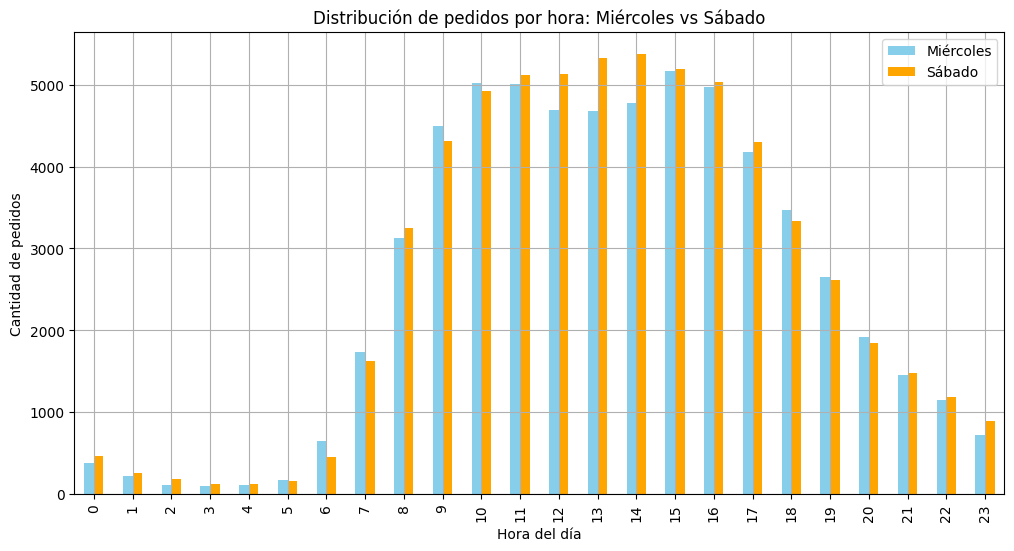

In [65]:
# Si ya tenemos los datos separados, podemos unirlos en un solo DF para que el gráfico sea más fácil de crear
wend_sat_df = pd.DataFrame({
    'Miércoles': wednesday_counts,
    'Sábado': saturday_counts
})

wend_sat_df.plot(
    kind='bar',
    xlabel='Hora del día',
    ylabel='Cantidad de pedidos',
    figsize=(12, 6),
    color=['skyblue', 'orange'],
    title='Distribución de pedidos por hora: Miércoles vs Sábado',
    grid=True
)

plt.show()

In [66]:
'''
Podemos observar que para ambos días, el rango de horas con más pedidos es entre las 9 a.m. y las 5 p.m.
Hay una diferencia significativa con el Sábado, ya que tiene más pedidos a comparación del Miércoles.
'''

'\nPodemos observar que para ambos días, el rango de horas con más pedidos es entre las 9 a.m. y las 5 p.m.\nHay una diferencia significativa con el Sábado, ya que tiene más pedidos a comparación del Miércoles.\n'

Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la gráfica! Es muy intuitivo hacer la comparación de esa forma
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

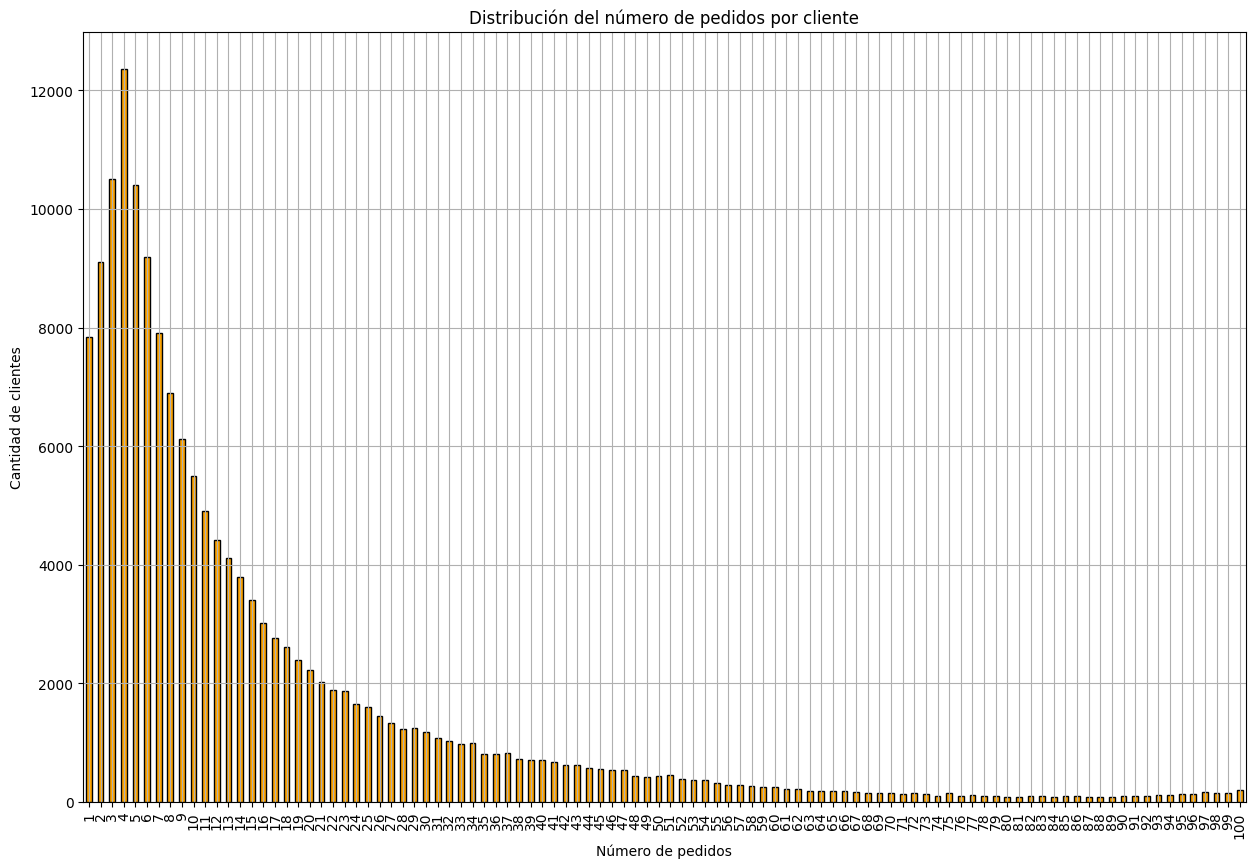

In [67]:
orders_per_customer = instacart_df.groupby('user_id')['order_number'].max() #Puesto que queremos saber el número de pedidos
#total de cada cliente, pongo la función max() 

order_distribution = orders_per_customer.value_counts().sort_index()

order_distribution.plot(
    kind='bar',
    figsize=(15, 10),
    color='orange',
    edgecolor='black',
    xlabel='Número de pedidos',
    ylabel='Cantidad de clientes',
    title='Distribución del número de pedidos por cliente',
    grid=True
)

plt.show()

Escribe aquí tus conclusiones

In [68]:
'''
Fácilmente vemos que más de 12,000 clientes hicieron 4 pedidos, seguido de 3 y 5 en segundo y tercer lugar respectivamente.'''

'\nFácilmente vemos que más de 12,000 clientes hicieron 4 pedidos, seguido de 3 y 5 en segundo y tercer lugar respectivamente.'

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

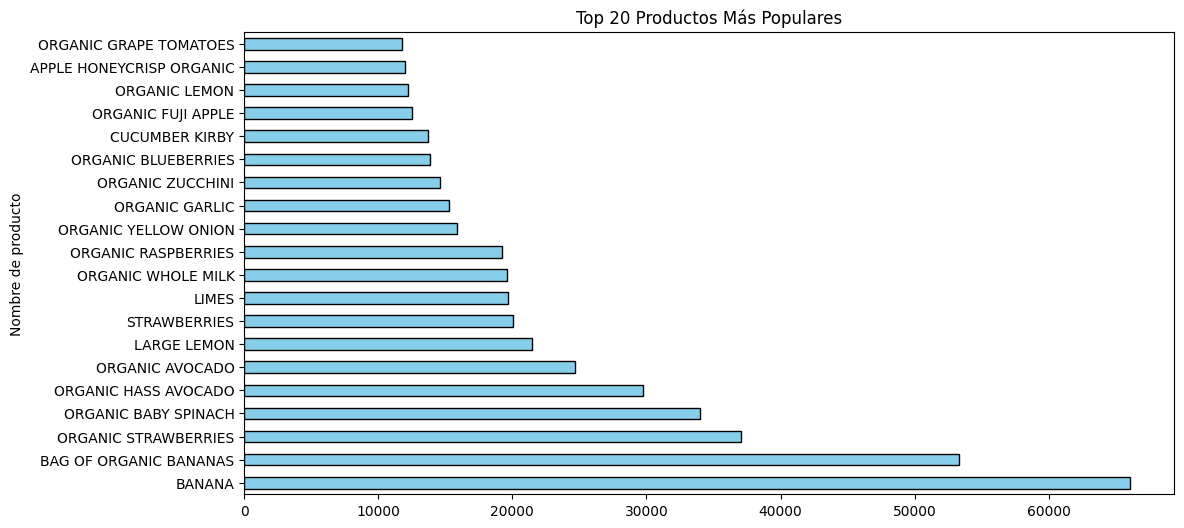

In [37]:
product_counts = order_products_df['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'order_count']

#Hacemos un merge para obtener el nombre del producto basado en su ID
top_20_products = product_counts.merge(products_df, on='product_id').head(20)
top_20_products = top_20_products.set_index('product_name') #Para poner el eje Y con el nombre de los productos

ax = top_20_products['order_count'].plot(
    kind='barh', 
    figsize=(12, 6),
    color='skyblue',
    edgecolor='black',
    title='Top 20 Productos Más Populares',
    xlabel='Nombre de producto'
)

plt.show()



Escribe aquí tus conclusiones

In [87]:
'''
Vemos que el producto más pedido es "Banana" con 66050 pedidos y ID 24852.
Curiosamente el segundo producto más pedido es la "Bag of Organic Bananas". Parece que son muy solicitadas.
'''

'\nVemos que el producto más pedido es "Banana" con 66050 pedidos y ID 24852.\nCuriosamente el segundo producto más pedido es la "Bag of Organic Bananas". Parece que son muy solicitadas.\n'

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho el cálculo! Sin embargo, para mejorar la comparación de tus resultados es mejor mostrar una gráfica de barras
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

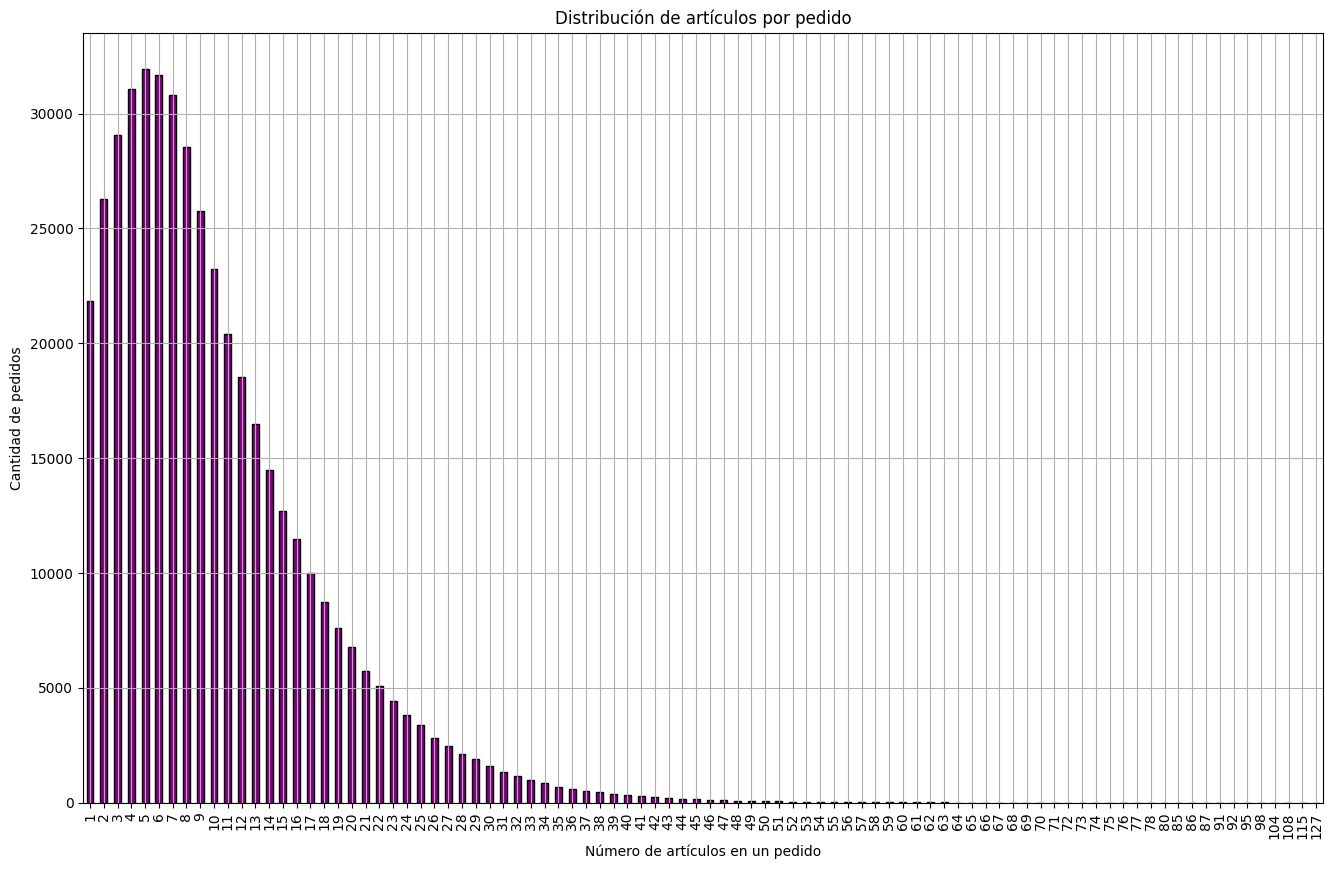

In [71]:
# Contar el número de artículos por pedido
items_per_order = order_products_df.groupby('order_id').size()

# Contar cuántos pedidos tienen una cantidad específica de artículos
order_distribution = items_per_order.value_counts().sort_index()

order_distribution.plot(
    kind='bar',
    figsize=(16, 10),
    color='purple',
    edgecolor='black',
    xlabel='Número de artículos en un pedido',
    ylabel='Cantidad de pedidos',
    title='Distribución de artículos por pedido',
    grid=True
)

plt.show()

Escribe aquí tus conclusiones

In [72]:
'''
La mayoría de los usuarios realizan pedidos de 5 productos, seguido de 6 pedidos en segundo lugar

'''

'\nLa mayoría de los usuarios realizan pedidos de 5 productos, seguido de 6 pedidos en segundo lugar\n\n'

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
reordered_products = order_products_df[order_products_df['reordered'] == 1]

reordered_counts = reordered_products['product_id'].value_counts().head(20)


reordered_counts = reordered_counts.reset_index()
reordered_counts.columns = ['product_id', 'reorder_count']
display(reordered_counts)

,product_id,reorder_count
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
5,47766,18743
6,27845,16251
7,47626,15044
8,27966,14748
9,16797,13945


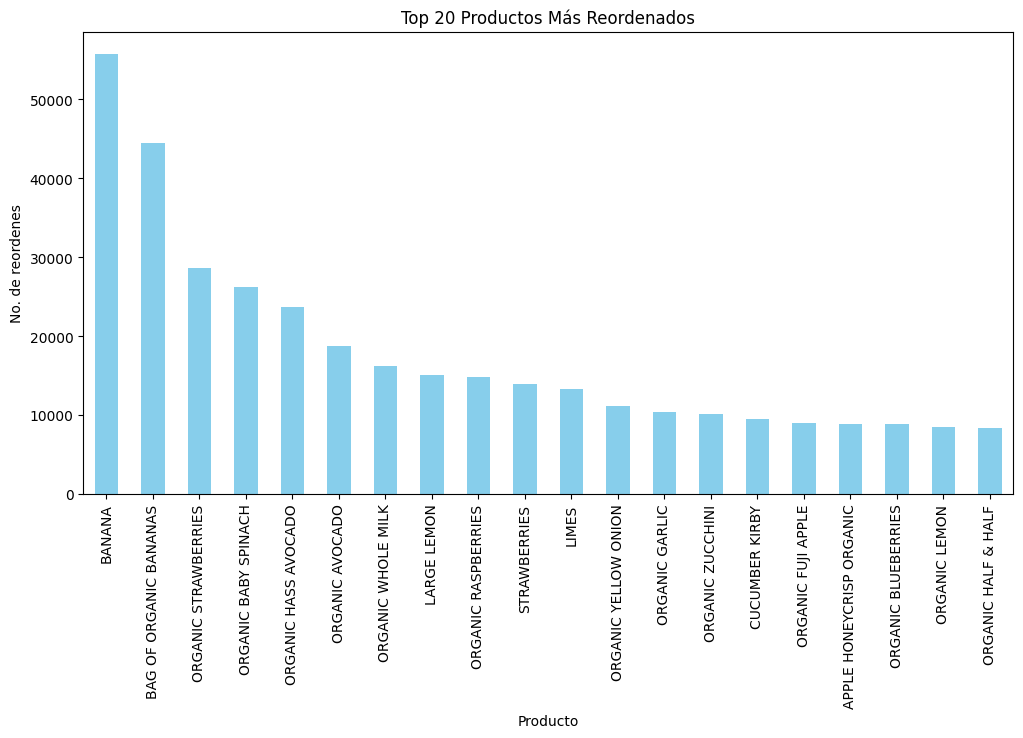

In [58]:
#Muy parecido al anterior, tenemos que realizar un merge para poder obtener el nombre del producto
top_20_reordered = reordered_counts.merge(products_df, on='product_id')

top_20_reordered.plot(
    x='product_name', 
    y='reorder_count', 
    kind='bar', 
    figsize=(12, 6), 
    color='skyblue',
    title='Top 20 Productos Más Reordenados',
    legend=False,
    xlabel='Producto',
    ylabel='No. de reordenes'
)

plt.show()


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí también sería bueno incluir una gráfica de barras para mostrar la diferencia entre productos
</div>

Escribe aquí tus conclusiones

In [75]:
'''
De igual manera, Banana y Bag of Organic Bananas son los productos más pedidos y los productos MÁS REORDENADOS. 


'''

'\nDe igual manera, Banana y Bag of Organic Bananas son los productos más pedidos y los productos MÁS REORDENADOS. \n\n\n'

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [76]:
reorder_counts = order_products_df[order_products_df['reordered'] == 1].groupby('product_id').size()
total_counts = order_products_df.groupby('product_id').size()

# Para saber la proporción, dividimos el total de veces que fue reordenado entre el total de pedidos por producto.
reorder_rate = (reorder_counts / total_counts).reset_index()
reorder_rate.columns = ['product_id', 'reorder_rate']

print(reorder_rate)

       product_id  reorder_rate
0               1      0.564286
1               2           NaN
2               3      0.738095
3               4      0.510204
4               7      0.500000
...           ...           ...
45568       49690      0.800000
45569       49691      0.430556
45570       49692      0.416667
45571       49693      0.440000
45572       49694      0.333333

[45573 rows x 2 columns]


In [77]:
reorder_rate = reorder_rate.merge(products_df, on='product_id')
reorder_rate = reorder_rate.sort_values('reorder_rate', ascending=False)


print(reorder_rate[['product_id', 'product_name', 'reorder_rate']])

       product_id                                       product_name  \
10973       12038           for Women Maximum Absorbency L Underwear   
1646         1809  Slow Kettle Style Santa Fe Chicken Enchilada S...   
33130       36122                                  Spicy Chili Beans   
2929         3205            Original Pure Chocolate Whippet Cookies   
38398       41901   Moisturizing Lotionized Shave Gel with Vitamin E   
...           ...                                                ...   
45543       49663  Ultra Protein Power Crunch Peanut Butter N' Ho...   
45550       49672                             Cafe Mocha K-Cup Packs   
45562       49684          Vodka- Triple Distilled- Twist of Vanilla   
45565       49687         Smartblend Healthy Metabolism Dry Cat Food   
45567       49689               FLUFFLY VANILLA MARSHMALLOW FROSTING   

       reorder_rate  
10973           1.0  
1646            1.0  
33130           1.0  
2929            1.0  
38398           1.0  
...

Promedio de tasa de repetición: 0.4864576580675399


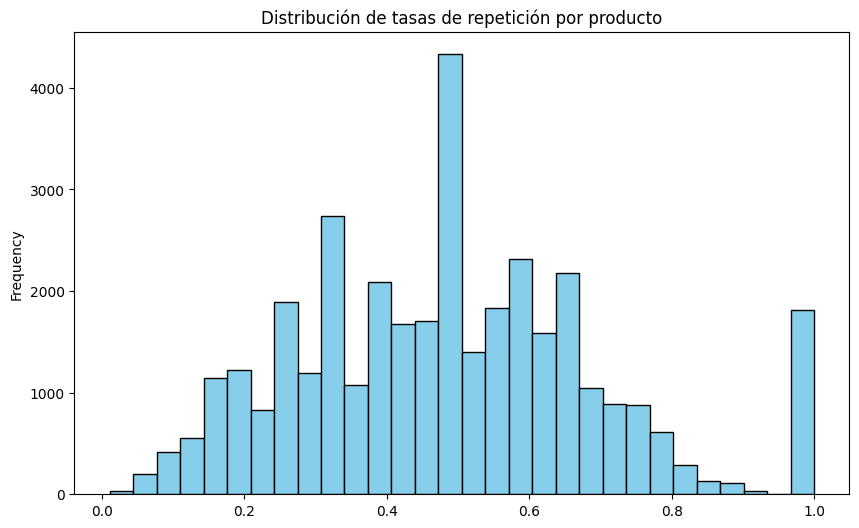

In [78]:
print("Promedio de tasa de repetición:", reorder_rate['reorder_rate'].mean())

reorder_rate['reorder_rate'].plot(
    kind='hist',
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    title='Distribución de tasas de repetición por producto',
    xlabel='Tasa de repetición',
    ylabel='Frecuencia'
)

plt.show()

Escribe aquí tus conclusiones

In [79]:
'''
Vemos en la gráfica que la tasa de repetición más amplia fue 0.5. Lo cual concuerda con el mean() de este.

'''

'\nVemos en la gráfica que la tasa de repetición más amplia fue 0.5. Lo cual concuerda con el mean() de este.\n\n'

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [80]:
merged_df = pd.merge(order_products_df, instacart_df[['order_id', 'user_id']], on='order_id', how='left')
#print(merged_df)

reordered_counts = merged_df[merged_df['reordered'] == 1].groupby('user_id')['product_id'].count()
#print(reordered_counts)

total_counts = merged_df.groupby('user_id')['product_id'].count()
#print(total_counts)

reorder_rate_per_user = (reordered_counts / total_counts).reset_index()
reorder_rate_per_user.columns = ['user_id', 'reorder_rate']

print(reorder_rate_per_user.sort_values('reorder_rate', ascending=False))

        user_id  reorder_rate
55883     77195           1.0
53896     74382           1.0
47071     65083           1.0
40714     56239           1.0
147949   203877           1.0
...         ...           ...
149582   206156           NaN
149592   206167           NaN
149597   206175           NaN
149605   206184           NaN
149610   206190           NaN

[149626 rows x 2 columns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien calculadas las proporciones! También podrías haber usado el groupby y aplicando `mean()` sobre la columna de reordered
</div>

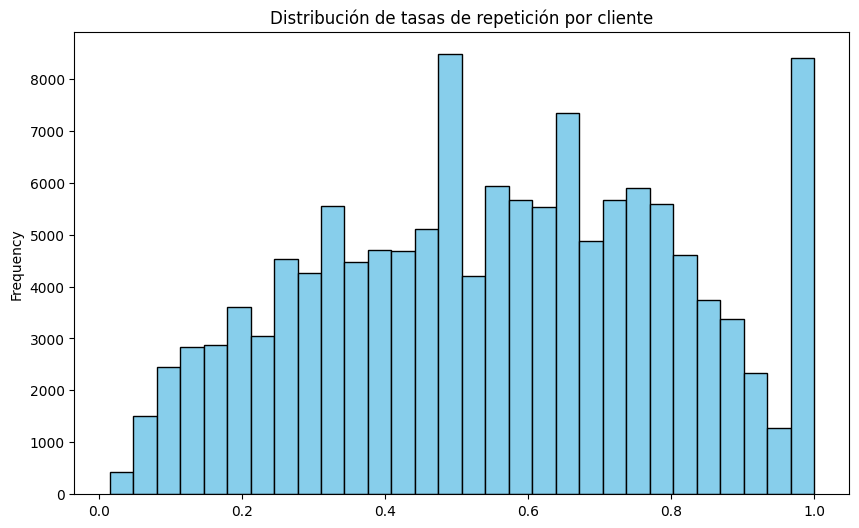

In [81]:
reorder_rate_per_user['reorder_rate'].plot(
    kind='hist',
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    title='Distribución de tasas de repetición por cliente',
    xlabel='Tasa de repetición',
    ylabel='Frecuencia'
)

plt.show()

Escribe aquí tus conclusiones

In [82]:
'''
Vemos la diferencia con los productos aplicados a los clientes. De igual manera, los valores de NaN son por aquellos clientes 
que no han realizado alguna reorden.
'''

'\nVemos la diferencia con los productos aplicados a los clientes. De igual manera, los valores de NaN son por aquellos clientes \nque no han realizado alguna reorden.\n'

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [83]:
first_items = order_products_df[order_products_df['add_to_cart_order'] == 1]

#Para saber cuántas veces se repite cada producto como primer artículo
first_item_counts = first_items.groupby('product_id').size().reset_index(name='count')

#También hacemos el merge para obtener el nombre del artículo
first_item_counts = pd.merge(first_item_counts, products_df[['product_id', 'product_name']], on='product_id', how='left')

#Obtenemos los 20 valores más frecuentes.
top_20_first_items = first_item_counts.sort_values(by='count', ascending=False).head(20)

print(top_20_first_items[['product_id', 'product_name', 'count']])

       product_id                 product_name  count
13414       24852                       Banana  15562
7127        13176       Bag of Organic Bananas  11026
15028       27845           Organic Whole Milk   4363
11384       21137         Organic Strawberries   3946
25439       47209         Organic Hass Avocado   3390
11786       21903         Organic Baby Spinach   3336
25732       47766              Organic Avocado   3044
10622       19660                 Spring Water   2336
9050        16797                 Strawberries   2308
15102       27966          Organic Raspberries   2024
24024       44632   Sparkling Water Grapefruit   1914
26519       49235          Organic Half & Half   1797
25658       47626                  Large Lemon   1737
115           196                         Soda   1733
20853       38689     Organic Reduced Fat Milk   1397
14158       26209                        Limes   1370
6660        12341                Hass Avocados   1340
3153         5785  Organic R

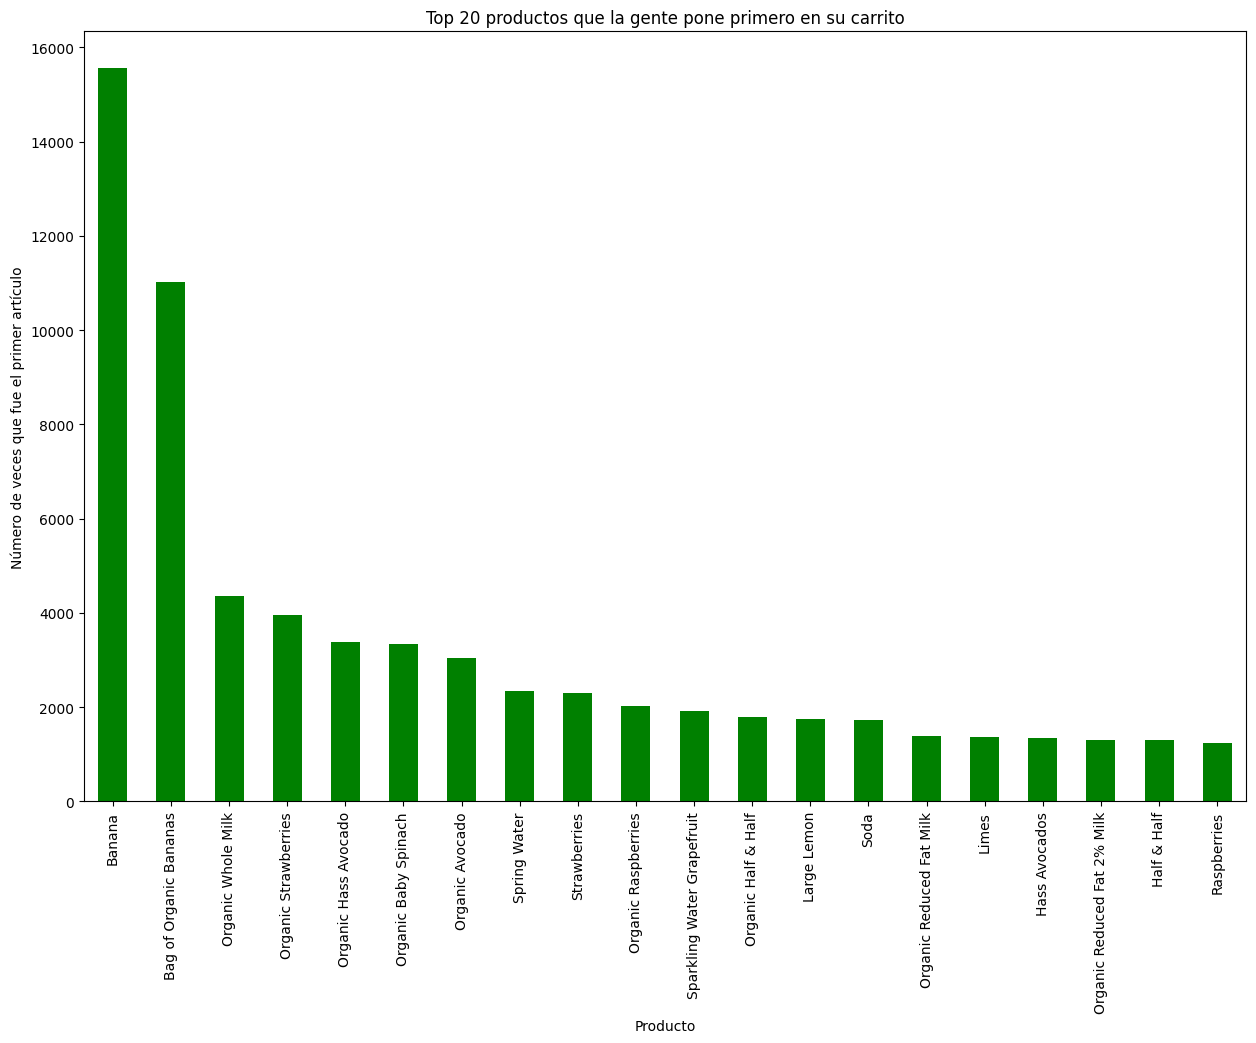

In [84]:
top_20_first_items.plot(
    kind='bar',
    x='product_name',
    y='count',
    figsize=(15, 10),
    color='green',
    legend=False,
    title='Top 20 productos que la gente pone primero en su carrito',
    xlabel='Producto',
    ylabel='Número de veces que fue el primer artículo'
)

plt.show()

Escribe aquí tus conclusiones

In [85]:
'''
Parece que las bananas y la bolsa de bananas son los productos estrella. Los más pedidos, los más re-pedidos y los primeros
en ser agregados al carrito. 
'''

'\nParece que las bananas y la bolsa de bananas son los productos estrella. Los más pedidos, los más re-pedidos y los primeros\nen ser agregados al carrito. \n'

### Conclusion general del proyecto:

# Conclusiones

## Calidad de los datos:

Se encontraron valores nulos en varios datasets, específicamente en columnas clave como **days_since_prior_order** y **product_name**.
La presencia de valores nulos en productos del "aisle 100" y "department 21" (Missing) indica que hay datos incompletos o faltantes, posiblemente relacionados con productos no registrados correctamente.
Se identificaron duplicados que fueron eliminados, específicamente en pedidos realizados el Miércoles a las 2:00 PM, lo que plantea la posibilidad de errores en el registro o un patrón recurrente en ese día y hora.
Distribuciones de datos:

La columna **days_since_prior_order** muestra que el tiempo entre pedidos varía entre 0 días (el cliente realiza un pedido el mismo día) y un máximo de 30 días. Esto indica que Instacart tiene una base diversa de clientes, algunos realizan compras muy frecuentes y otros más espaciadas.
La mayoría de los clientes hacen entre 4 y 5 pedidos en total, lo que podría sugerir un comportamiento promedio de uso de la plataforma.

## Patrones de compras:

Los pedidos son más comunes entre las 9:00 a.m. y las 5:00 p.m., lo cual tiene sentido considerando que son horarios laborales o de actividad para la mayoría de las personas.
Comparando días específicos, el Sábado muestra una mayor actividad de pedidos que el Miércoles, probablemente porque es un día más conveniente para realizar compras.

## Productos más populares:

Banana y Bag of Organic Bananas son los productos estrella:
Son los más pedidos (con 66,050 y 49,600 pedidos respectivamente).
También son los productos más reordenados, indicando que forman parte del hábito de compra recurrente de los clientes.
Además, son los productos más frecuentes en el carrito como primera opción.
Estos hallazgos sugieren que las bananas, tanto orgánicas como no orgánicas, son una categoría esencial en el mercado de Instacart.

## Tasa de repetición de pedidos:

A nivel de producto, la tasa de repetición promedio fue 0.5, lo que indica que aproximadamente la mitad de los productos pedidos ya habían sido pedidos anteriormente.

**Básicamente, el análisis destaca la importancia de tener datos limpios y organizados para extraer información valiosa y tomar 
decisiones estratégicas. **


<div class="alert alert-block alert-danger">
<b>Comentario final (1ra Revision)</b> <a class=“tocSkip”></a>
    

Hiciste un buen trabajo Alan! Haría falta algunas correcciones donde te he dejado mis comentarios y también tus conclusiones finales del proyecto ya que se debe redactar la interpretación de los resultados que estás mostrando, se nota tu conocimiento de las herramientas de manejo de datos cómo lo es pandas y la interpretación de los resultados. Las conclusiones generales deben ser redactadas en base a los cálculos y las gráficas obtenidas y además, deberías redactar tus comentarios en celdas tipo Markdown para mejorar la presentación de tus proyectos.
    

Te he ido dejando mis comentarios y recomendaciones sobre algunos puntos que espero te sirvan para tu siguiente iteracion y tus próximos proyectos.
    
Un saludo!
</div>